# Collect Jobs Data using Jobs API

Before starting Run Jobs_API.ipynb file or Download and Run the API following this link [Jobs_API](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/Jobs_API.ipynb) 

In [6]:
#Import required libraries
import pandas as pd
import json
import requests 

In [7]:
#!pip install openpyxl
from openpyxl import Workbook

### Function to get the number of jobs for the given technology.

In [8]:
api_url="http://127.0.0.1:5000/data"
def get_number_of_jobs_T(technology):
    
    #your code goes here
    param={'Key Skills':technology}
    r=requests.get(api_url,params=param)
    if r.ok:
        jobs=r.json()
        number_of_jobs=len(jobs)
        return technology,number_of_jobs
    else:
        return f"Error: Unable to fetch data. Status code: {r.status_code}"
        

In [9]:
get_number_of_jobs_T("Python") #Calling the function for Python and checking if it works.

('Python', 1173)

### Function to find number of jobs in US for a location of a given choice


In [10]:
 def get_number_of_jobs_L(location):
    
    #your coe goes here
    param={'Location':location}
    r=requests.get(api_url,params=param)
    if r.ok:
        jobs=r.json()
        number_of_jobs=len(jobs)
    return location,number_of_jobs

In [11]:
get_number_of_jobs_L('Los Angeles') #Call the function for Los Angeles and check if it is working.

('Los Angeles', 640)

In [12]:
#List of Locations
Loclist=['Los Angeles',
'New York',
'San Francisco',
'Washington DC',
'Seattle',
'Austin',
'Detroit']
# your code goes here
Techlist=['C',
'C#',
'C++',
'Java',
'JavaScript',
'Python',
'Scala',
'Oracle',
'SQL Server',
'MySQL Server',
'PostgreSQL',
'MongoDB']

### Storing the result in an excel file

In [13]:
# Create a workbook object
wb = Workbook()
# Access the active worksheet
ws = wb.active

Save the number of job for different location into an excel spreadsheet named **job-postings-loc.xlsx**.

In [14]:
ws.append(['Location', 'Number of job posting'])
for loc in Loclist:
    location, num_job=get_number_of_jobs_L(loc)
    ws.append([location, num_job])
wb.save("job-postings-loc.xlsx")

Save the number of job for different technology into an excel spreadsheet named **job-postings-tech.xlsx**.

In [15]:
wb1 = Workbook()
# Access the active worksheet
ws1 = wb1.active
#your code goes her
ws1.append(['Technology', 'Number of job posting'])
for tech in Techlist:
    Tech, num_job=get_number_of_jobs_T(tech)
    ws1.append([Tech, num_job])
    
#your code goes here
# Save the workbook as "job-postings.xlsx"
wb1.save("job-postings-tech.xlsx")

## Web Scraping for popular programming language and their annual avarage salary

In [16]:
from bs4 import BeautifulSoup as bs
import csv

In [17]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

In [18]:
# Getting the webpage data
req=requests.get(url).text

In [19]:
soup=bs(req,'html.parser') #parsing the webpage html data

In [20]:
#your code goes here
mydict={}
for row in soup.find_all('tr'):
    col=row.find_all('td')
    lan_name=col[1].getText()
    sal=col[3].getText()
    mydict[lan_name]=sal
    #print(f'{lan_name}.....> {sal}') # uncomment to see the result 
#mydict #uncomment to check the dictionary 

### Saving the scrapped data into a file named *popular-languages.csv*

In [21]:
with open("popular-languages.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)  
    [writer.writerow([key, value]) for key,value in mydict.items()] 

print("Data successfully saved to popular-languages.csv")


Data successfully saved to popular-languages.csv


# Creating bar graph for Job posting tech and popular languages 

In [22]:
import matplotlib.pyplot as plt

### Bar graph for job posting

In [23]:
df=pd.read_excel('job-postings-tech.xlsx')
df.set_index('Technology',inplace=True)
df.sort_values('Number of job posting', ascending=False, inplace=True)

In [24]:
df.head()

,Number of job posting
Technology,
C,13498
Java,2609
Python,1173
Oracle,784
JavaScript,355


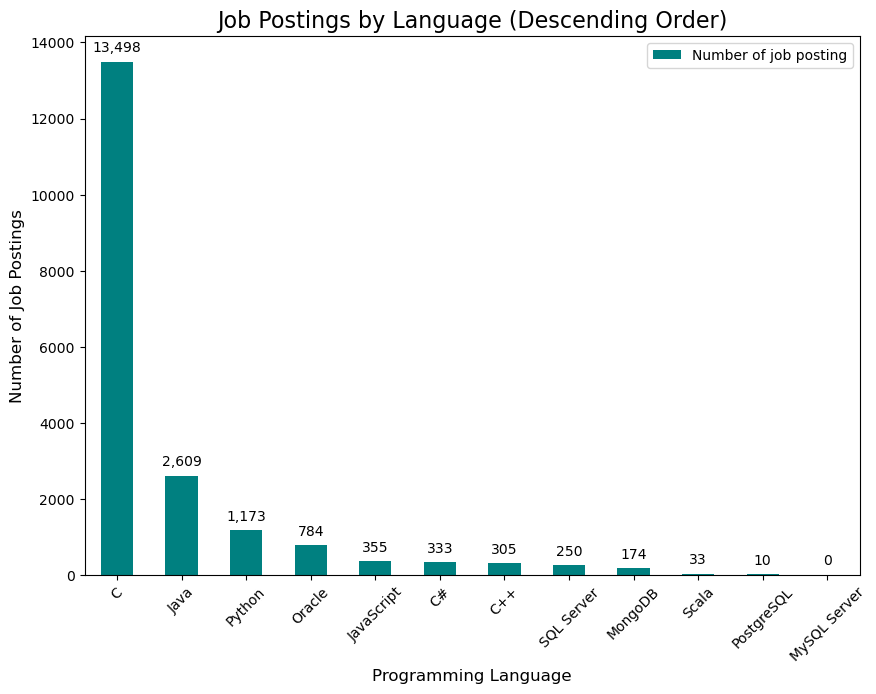

In [31]:
ax = df.plot.bar(color='teal', figsize=(10, 7))
# Annotate the bars
for index, value in enumerate(df['Number of job posting']):
    label = f"{format(int(value), ',')}"  # format with commas
    plt.annotate(label, 
                 xy=(index, value),  # Position (x: bar index, y: bar height)
                 xytext=(0, 5),      # Offset the text slightly above the bar
                 textcoords='offset points', 
                 ha='center',        # Center-align the text horizontally
                 va='bottom',        # Bottom-align the text vertically
                 fontsize=10, 
                 color='black')      # Text color                    # Font size
plt.title('Job Postings by Language (Descending Order)', fontsize=16)
plt.xlabel('Programming Language', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()

### Bar graph for popular language salary

In [26]:
df2=pd.read_csv('popular-languages.csv')
df2.set_index('Language',inplace=True)


In [27]:
df2['Average Annual Salary']=df2['Average Annual Salary'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\moham\AppData\Local\Temp\ipykernel_8028\3255360004.py:1: SyntaxWarning: invalid escape sequence '\$'
  df2['Average Annual Salary']=df2['Average Annual Salary'].replace('[\$,]', '', regex=True).astype(float)


In [28]:
df2.sort_values('Average Annual Salary', ascending=False, inplace=True)

In [29]:
df2.head()

,Average Annual Salary
Language,
Swift,130801.0
Python,114383.0
C++,113865.0
Javascript,110981.0
Java,101013.0


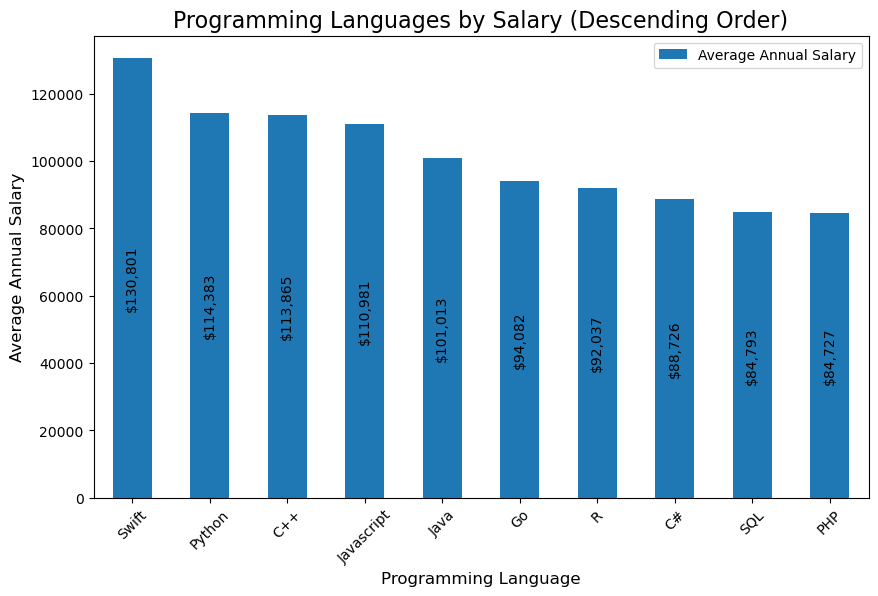

In [30]:
ax=df2.plot.bar(figsize=(10,6))
plt.title('Programming Languages by Salary (Descending Order)', fontsize=16)
plt.xlabel('Programming Language', fontsize=12)
plt.ylabel('Average Annual Salary', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
for p in ax.patches:
    ax.annotate(f"${p.get_height():,.0f}", (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                ha='center', va='center', fontsize=10, color='black',rotation=90)
plt.show()